In [3]:
%matplotlib inline

from scipy.optimize import curve_fit
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Siler survival probability function
def siler_survival(x, a1, a2, a3, b1, b2):
    return np.exp(
        (np.exp(a1) / b1 * (np.exp(-b1 * x) - 1))
        - (np.exp(a2) / b2 * (np.exp(b2 * x) - 1))
        - (np.exp(a3) * x))

In [5]:
# age categories for which we have data
xdata = np.array([0, 1] + list(range(5, 86, 5)))

In [6]:
# Australian survival probabilities from WHO data
surv_prob_aus = np.array([
    1,
    0.9966258499999999,
    0.9959771,
    0.9955199,
    0.9950323000000001,
    0.99356,
    0.9915906,
    0.9892339,
    0.98621725,
    0.9819688000000001,
    0.9757235000000001,
    0.9668716500000001,
    0.9537617999999999,
    0.93466405,
    0.9064473000000001,
    0.86506565,
    0.8007930999999999,
    0.69907905,
    0.54191785
])

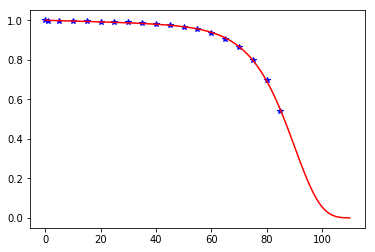

In [7]:
# fit parameters against the WHO data points (stored in po)
po, pc = curve_fit(siler_survival, xdata, surv_prob_aus, [-3, -10, -8, 4, 0.1])

# plot both the original data and the fit function
xval = np.linspace(0,110,111)
plt.plot(xdata, surv_prob_aus, 'b*', label='data')
plt.plot(xval, siler_survival(xval, *po), 'r-', label='fit')


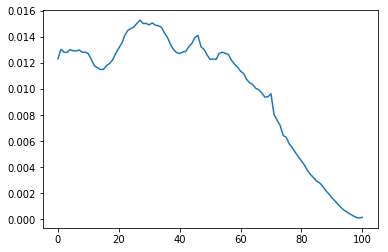

In [8]:
# load in a target age pyramid 
# (here Aus population in 2017)
age_pyramid = []
with open('./data/aus_pop_dist_2017.csv') as infile:
    for row in infile:
        age_pyramid.append(float(row))

plt.plot(age_pyramid)

In [9]:
# calculate the number of births (as a proportion of target final
# population size) required in each of the preceding
# 100 years in order to (in combination with survival probabilities)
# produce target age distribution.

def birth_numbers(age_pyramid):
    num_births = []
    for t in range(101):
        num = age_pyramid[t] / siler_survival(t, *po)
        num_births.append(num)
    return np.array(num_births)

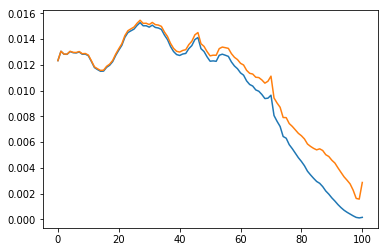

In [10]:
# calculate birth numbers based on target age structure
birth_num = birth_numbers(age_pyramid)

# let's plot this against the actual age structure
plt.plot(age_pyramid)
plt.plot(birth_num)

# note the discrepancy for the older age classes as the 
# reduced survival probability here mean that we need to generate
# a greater number of births in order that sufficient survive.

In [11]:
# write these birth numbers out to a file to be read in by simodd-pop
with open('./birth_num.dat', 'wt') as ofile:
    for b in birth_num[::-1]:
        ofile.write('{}\n'.format(b))